# **Informe del Análisis de Calidad de Datos**

## **Objetivo**
Business Payments LTD necesita optimizar la estrategia de marketing a través de un análisis confiable de los datos de sus clientes y transacciones. La organización cuenta con un gran conjunto de datos relacionados con los pagos, pero su equipo no está seguro de cómo analizarlos de manera efectiva. Este análisis busca evaluar y mejorar la calidad de los datos para garantizar la confiabilidad en el análisis posterior.

---

## **Conjuntos de Datos**
El cliente proporcionó los siguientes dos datasets:
- **cash_request**: Contiene información sobre solicitudes de efectivo realizadas por los clientes.
- **fees**: Contiene datos relacionados con las tarifas aplicadas a las transacciones.

---

## **Marco de Calidad de Datos**

### **Dimensiones Evaluadas**
El análisis de calidad de los datos se realizó utilizando las siguientes dimensiones, basadas en el Marco de Calidad de Datos:

1. **Integridad**  
   - Evaluación: ¿Qué proporción de las entidades tienen datos completos?  
   - Métrica: Número de valores faltantes detectados.  


**1.1 Integridad para df_cashrequest**

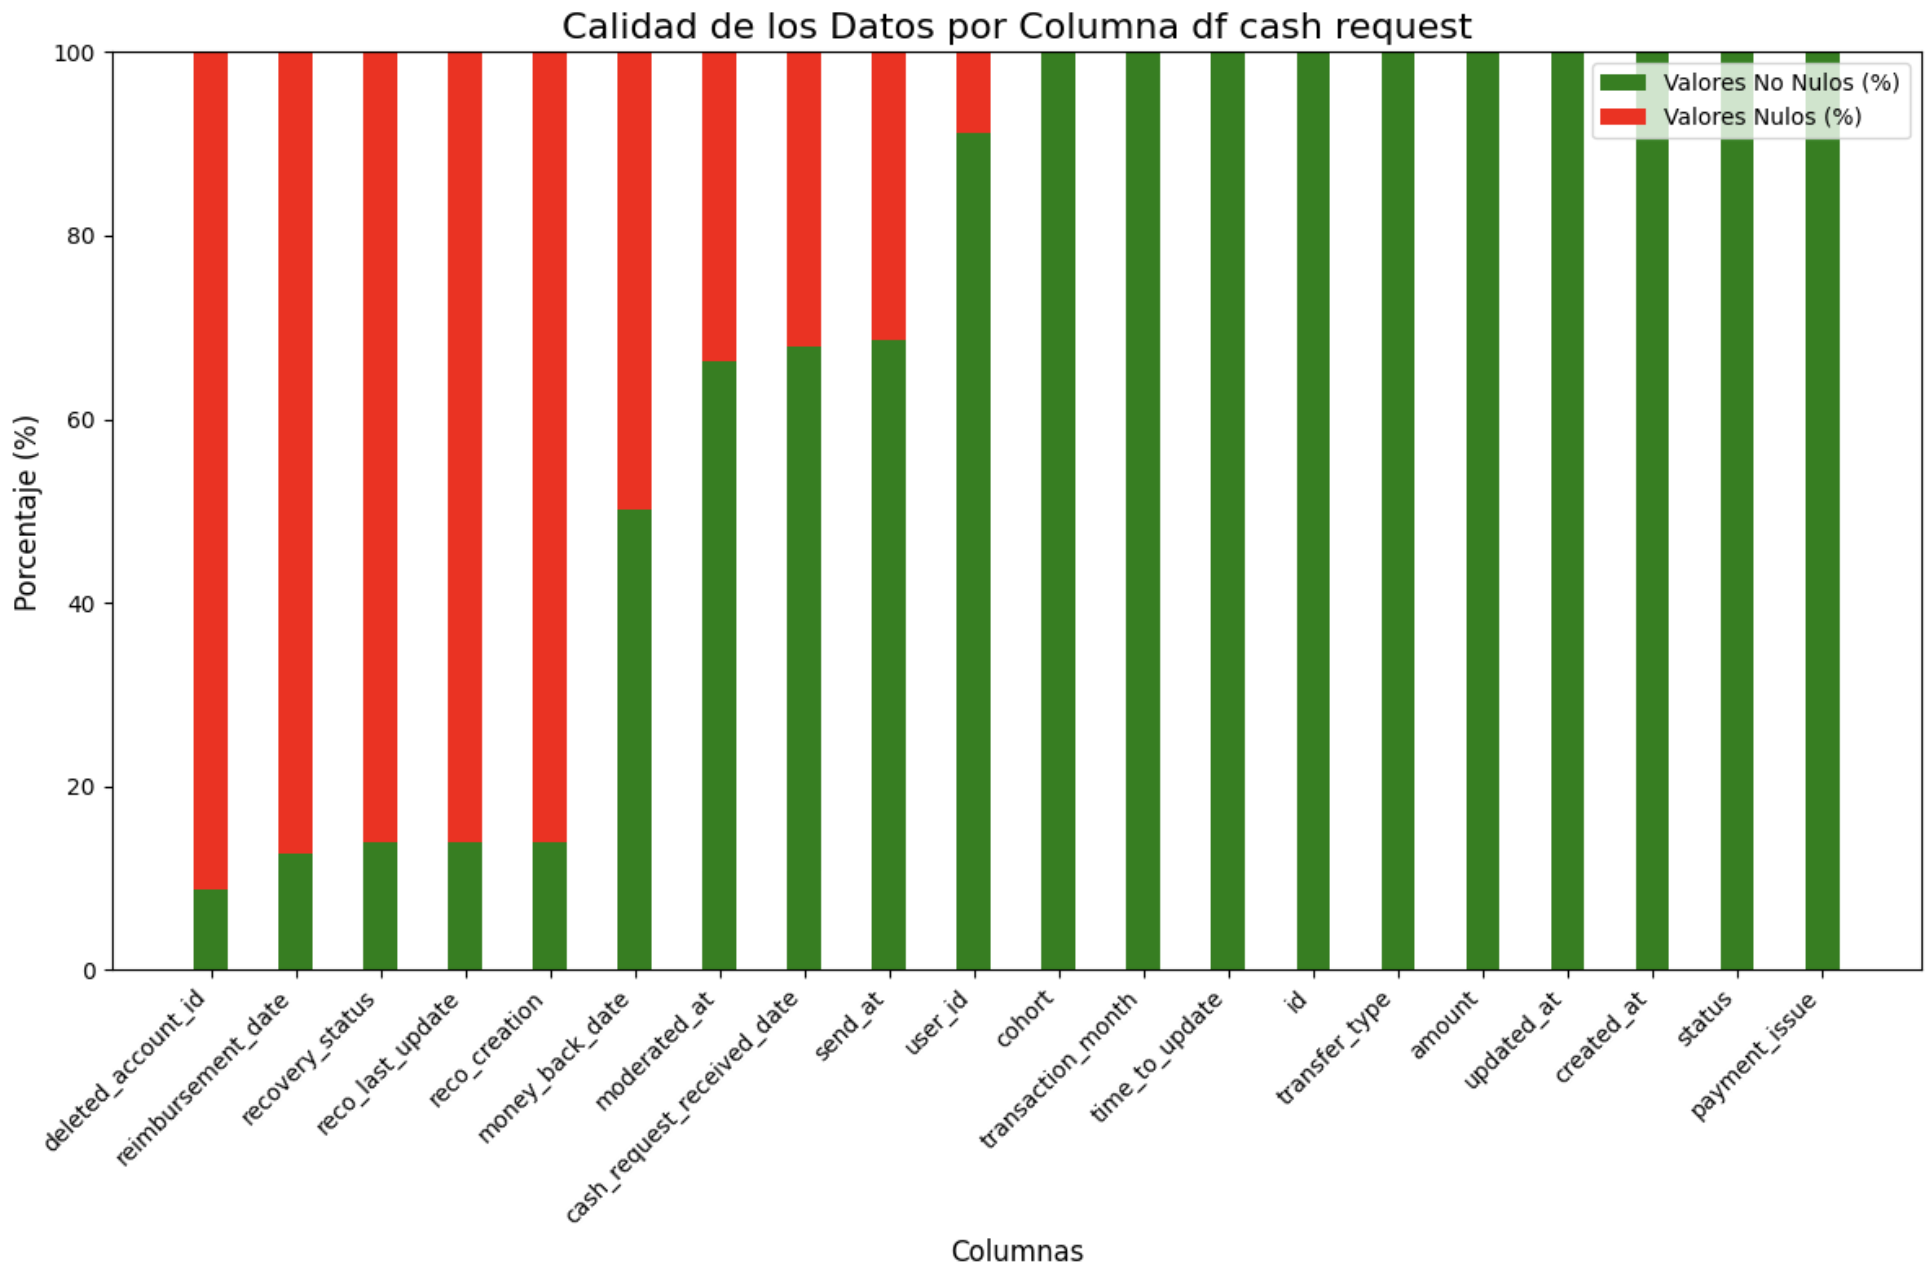

Inspección de las columnas:

Columnas con bastantes valores faltantes: moderated_at, deleted_account_id, reimbursement_date, money_back_date, recovery_status, reco_creation, reco_last_update.

Columnas con algunos valores faltantes: user_id, cash_request_received_date, send_at.

**1.2 Integridad para df_fees**

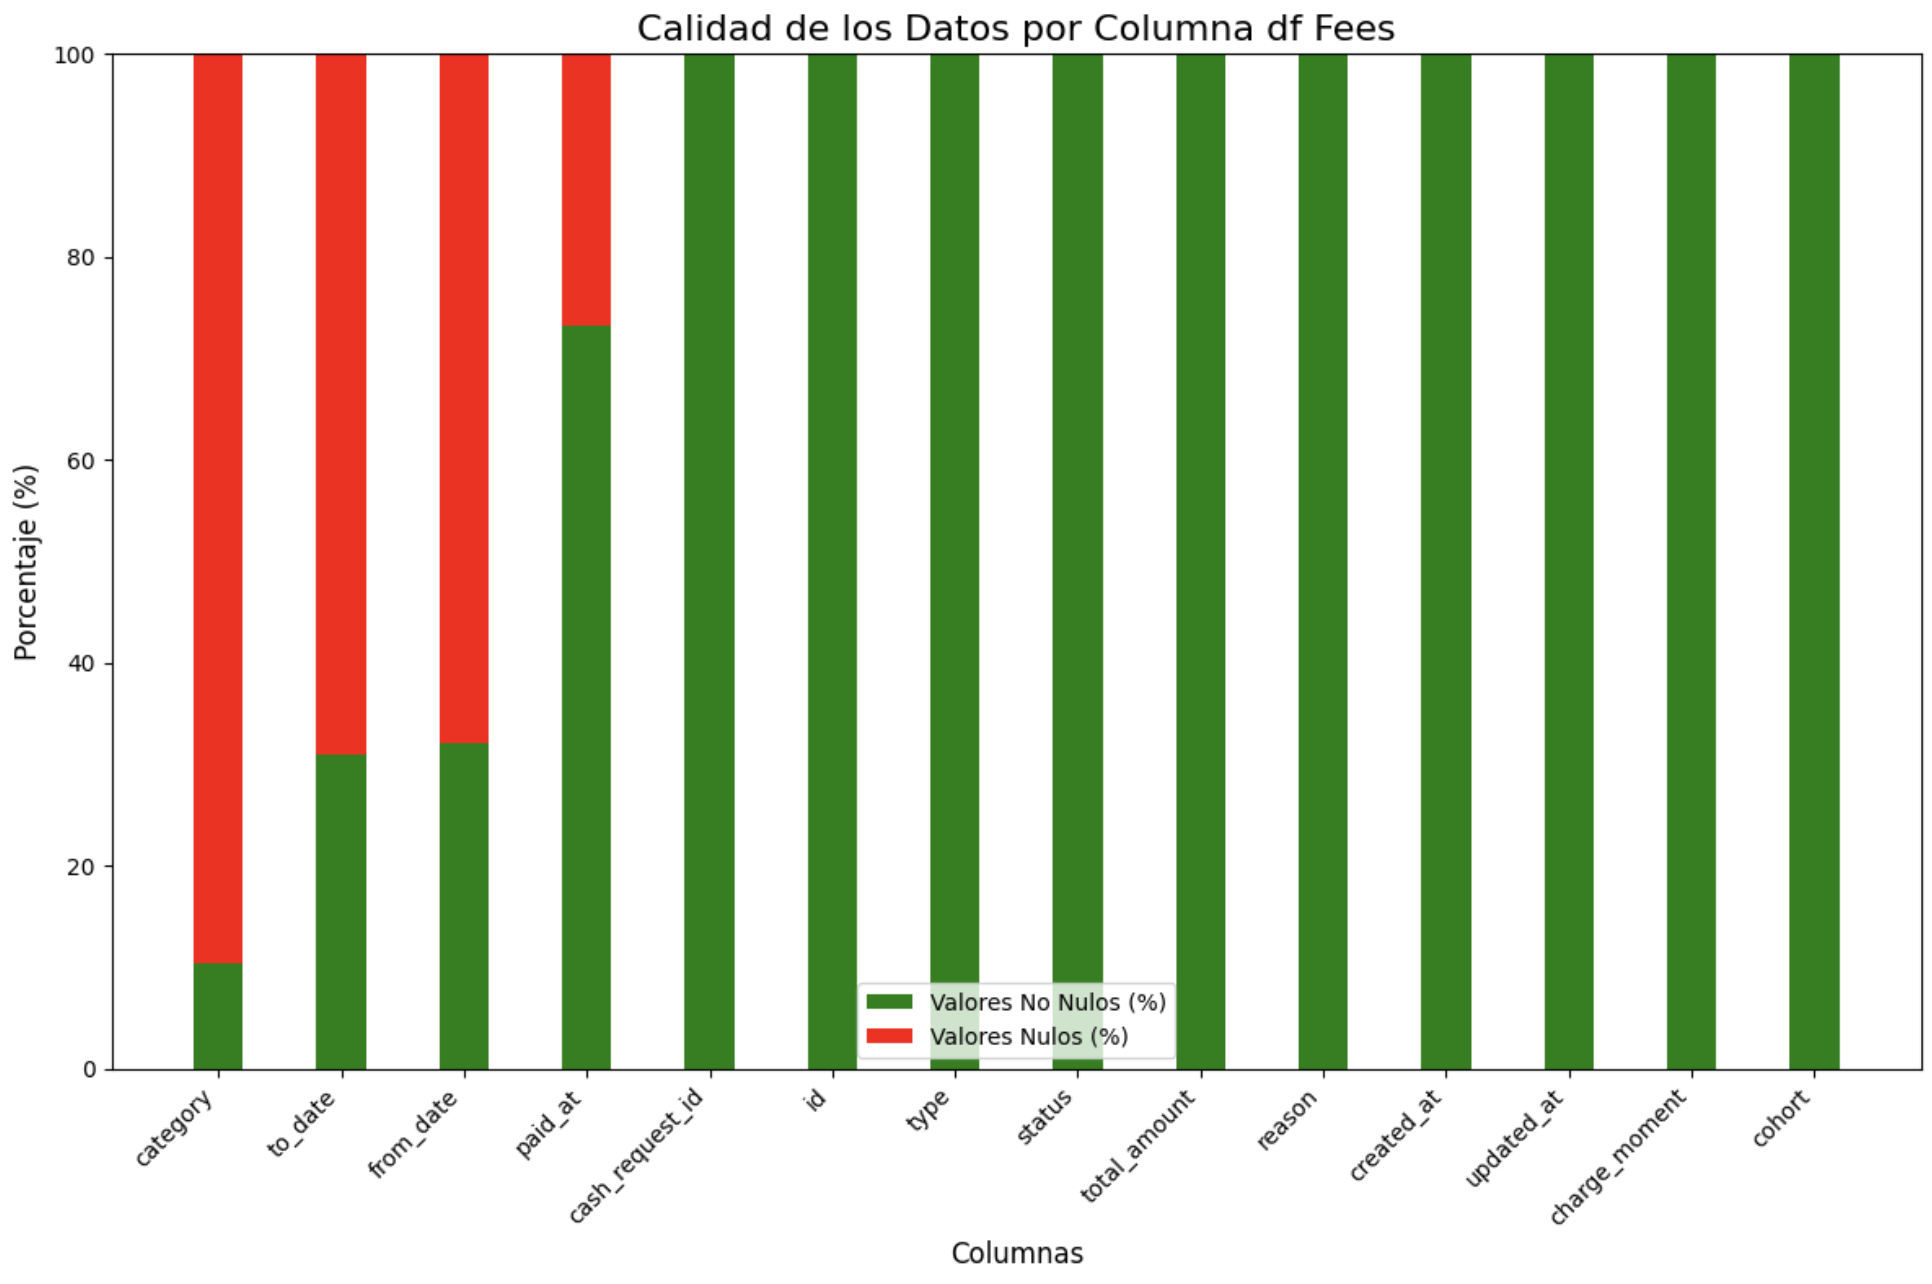

Inspección de las columnas:

Columnas con bastantes valores faltantes: category, to_date, from_date.

Columna con algunos valores faltantes: paid_at


2. **Consistencia**  
   - Evaluación: ¿Qué tan consistentes son los datos en las diferentes tablas?  
   - Métrica: Número de inconsistencias encontradas en los datos.

**2.1 Consistencia df_cashrequest**


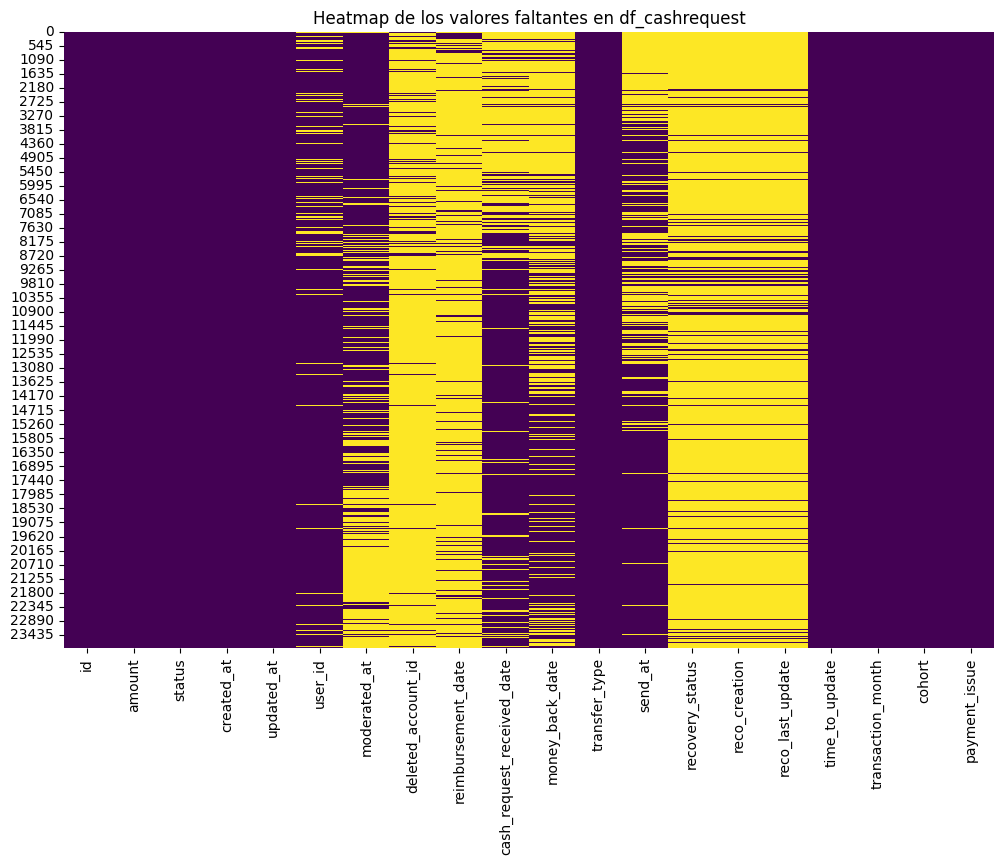

Al observar la gráfica y los patrones de los valores faltantes, podemos identificar agrupaciones lógicas y casuísticas basadas en el nombre de las columnas y su relación. Aquí se detallan las posibles agrupaciones que explican los datos vacíos:

1. Datos relacionados con cuentas eliminadas o moderadas:
Si deleted_account_id tiene un valor, es probable que moderated_at también lo tenga. Los valores nulos en estas columnas podrían reflejar que:
La cuenta no ha sido eliminada ni moderada, por lo tanto, estos datos no aplican.
- Casuística: "Solo aplica a cuentas eliminadas o moderadas".

2. Fechas relacionadas con transacciones
reimbursement_date, cash_request_received_date, money_back_date, send_at:
Estas fechas están asociadas a transacciones o solicitudes específicas.
La ausencia de una solicitud de reembolso o devolución.
- Casuística: "Fechas dependientes de una acción previa (reembolso, solicitud, etc.)".

3. Estados de recuperación y recomendaciones
recovery_status, reco_creation, reco_last_update:
- Los valores en estas columnas son relevantes solo si el caso pasó por un proceso de recuperación o recomendación.
Los valores nulos podrían reflejar:
Que la cuenta o transacción no tuvo problemas o no requirió recuperación.
Que no hay recomendación asociada.
- Casuística: "Solo aplica a casos con problemas de recuperación o recomendaciones activas".

4. Identificadores y usuarios
user_id:
- Casuística: "Datos faltantes para usuarios no identificados".

5. Variables generales:
transfer_type, payment_issue, status:
Estas columnas parecen completas y probablemente funcionan como "anclas" para las casuísticas mencionadas. Por ejemplo:
Ciertos tipos de transfer_type podrían implicar la falta de fechas como reimbursement_date o cash_request_received_date.
El estado de payment_issue puede justificar valores faltantes en columnas relacionadas con recuperación.


**2.2 Consistencia df_fees**

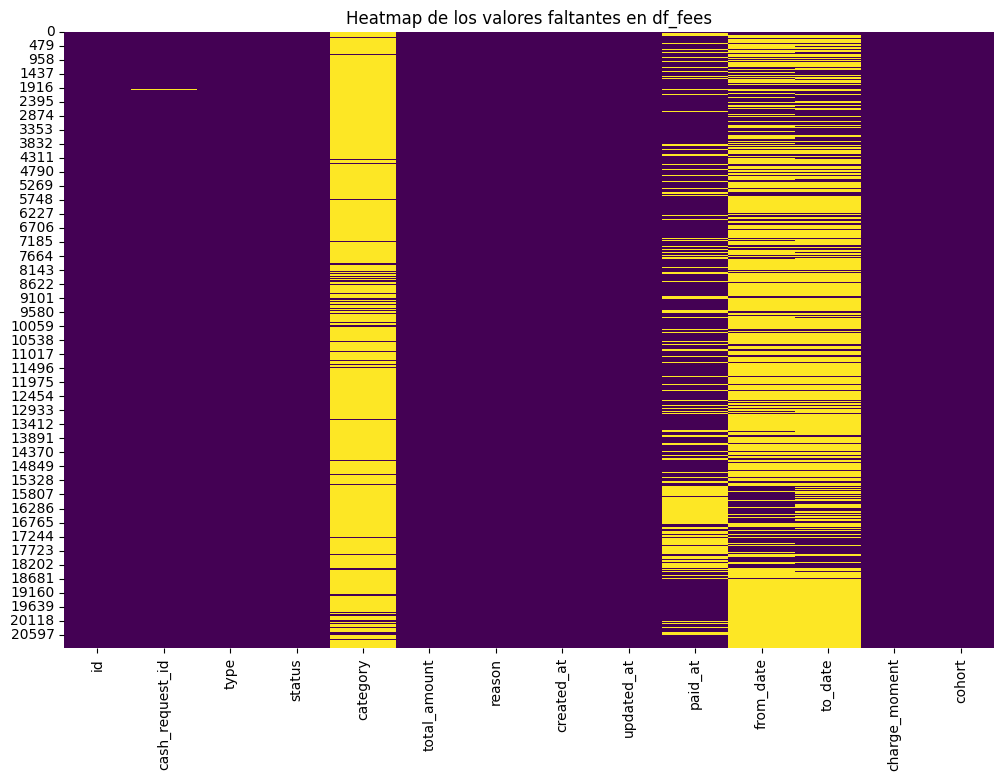

Aunque se pueden identificar inconsistencias relevantes, más adelante estas serán resueltas con el objetivo de preparar los datos para el modelo.

Según la descripción de los datos proporcionada, podemos comenzar analizando sistemáticamente los valores faltantes y sus relaciones. Procedamos paso a paso.

1. Columna: category

Valores únicos: ['rejected_direct_debit', 'month_delay_on_paid', NaN].
Esta columna tiene un alto porcentaje de valores faltantes (solo 2196 no nulos de 21 061 filas).
- Nota: Con solo dos valores únicos no nulos, esta columna se puede clasificar en categorías binarias o nominales.

2. Columna: paid_at

Las estadísticas resumidas muestran que los datos oscilan entre el 23 de junio de 2020 y el 12 de febrero de 2021.
- Falta: ~26% de los datos.

3. Columna: from_date y to_date

from_date tiene 6.749 entradas no nulas, mientras que to_date tiene 6.512.
Ambos representan intervalos de tiempo, con from_date anterior a to_date.
- Los valores faltantes pueden ser imputables utilizando patrones temporales.

**2.3 Heatmaps de correlación de valores faltantes**

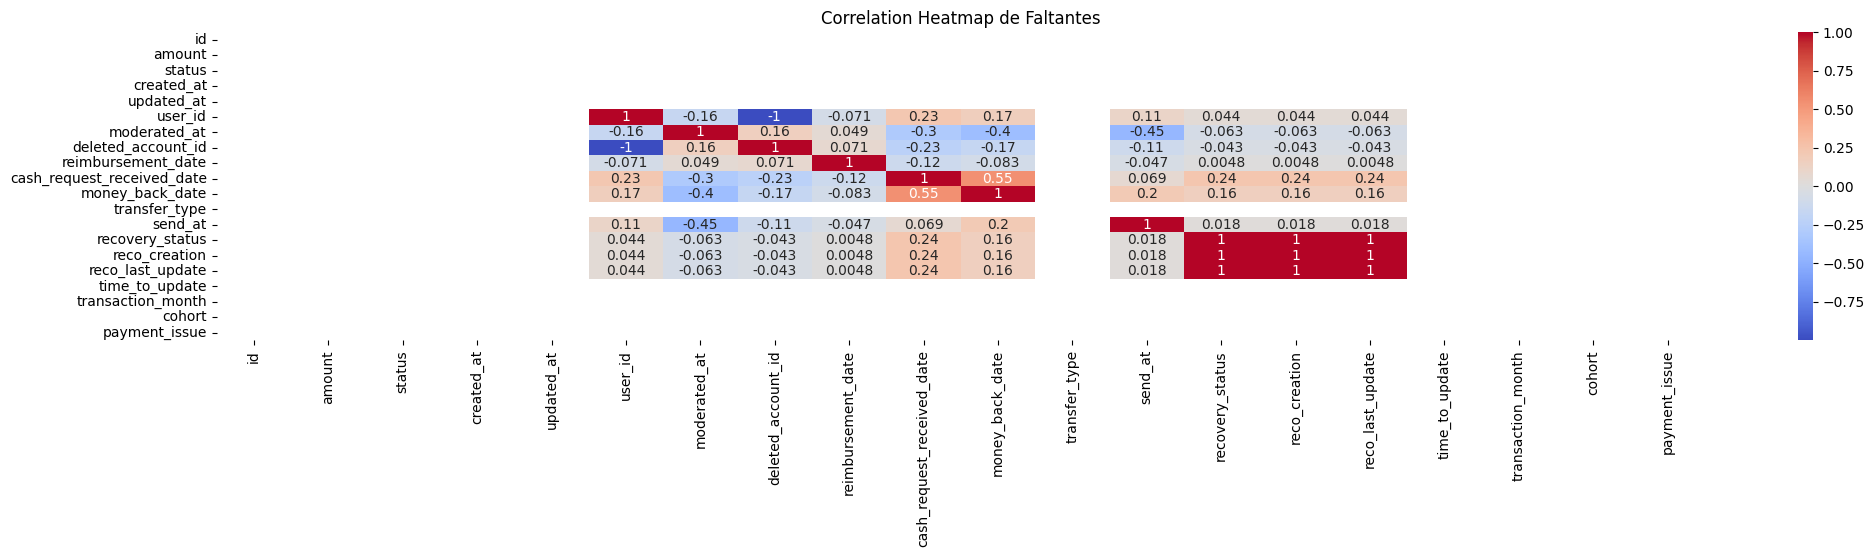

Acabamos de ver el heatmat de correlación de valores faltantes para df_cashrequest.

- Fuerte correlación positiva (valores cercanos a 1):

deleted_account_id y moderated_at tienen una correlación alta de faltantes, lo que sugiere que si una columna tiene un valor nulo, es probable que la otra también lo tenga.

money_back_date y transfer_type también están correlacionadas positivamente. Esto puede reflejar una dependencia entre estas columnas en términos de datos faltantes.

- Correlación negativa (valores cercanos a -1):

id y moderated_at presentan una correlación negativa significativa (-0.16). Esto implica que si una columna tiene un valor presente, es probable que la otra tenga un faltante.

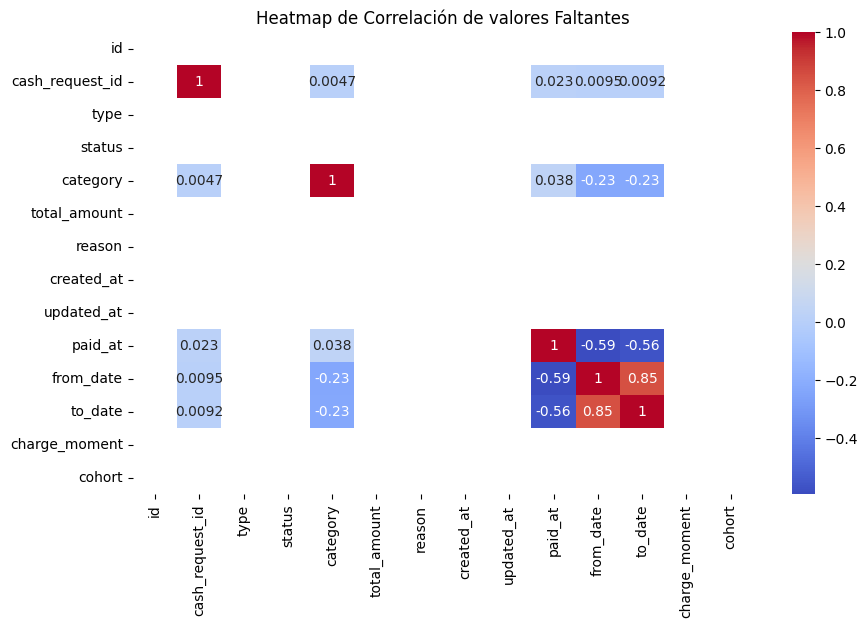

Los valores faltantes de from_date, to_date y paid_at están altamente correlacionados (~0,85 entre from_date y to_date, ~0,59 conpaid_at), lo que indica que cuando falta uno de estos, es probable que también falten otros.

Información procesable: esta fuerte relación sugiere una dependencia temporal, y podemos considerar imputar estas columnas de forma conjunta utilizando modelos de interpolación o regresión.


3. **Relevancia / Auditabilidad**  
   - Evaluación: ¿Qué tan relevantes son los datos proporcionados para las entidades analizadas?  
   - Métrica: Número de valores irrelevantes o no auditables.  
   

**3.1 Relevancia en los datos para df_cashrequest**

Aunque haya una alta correlación entre 'deleted_account_id' y 'moderated_at':

Valores nulos en estas columnas son esperados en ciertos casos:

- moderated_at será nulo si la solicitud no necesita revisión manual.
- deleted_account_id será nulo para usuarios activos.


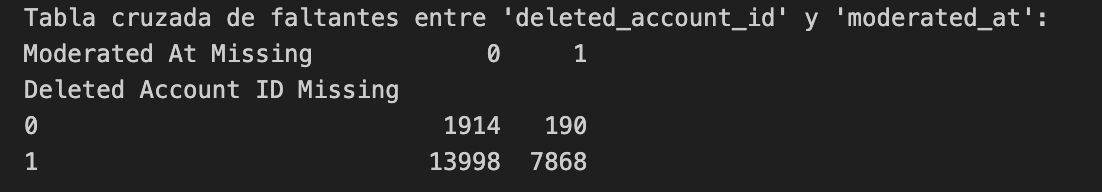

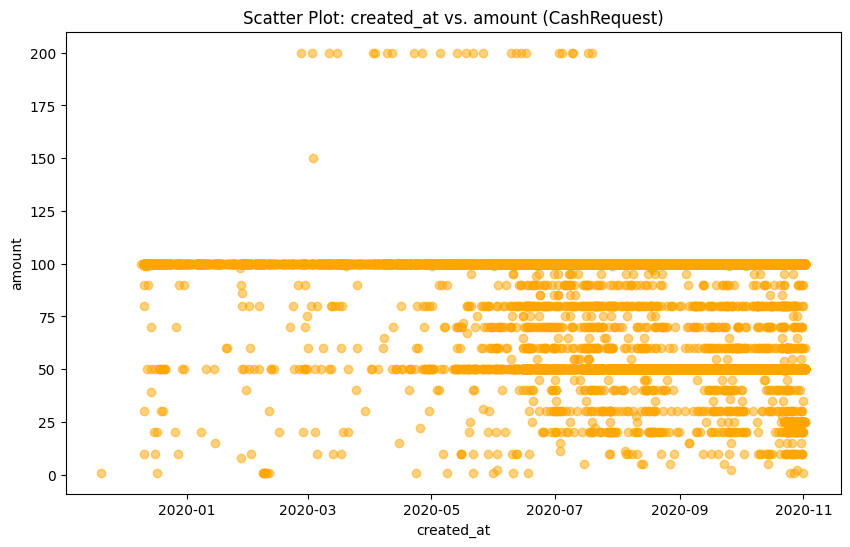

Mayores observaciones:
- La mayoría de los valores de amount están entre 0 y 100, con varias concentraciones alrededor de montos específicos (p. ej., 50, 75, 100).
- Hay unos pocos valores por encima de 100, e incluso algunos cercanos a 200, que podrían representar: Transacciones de mayor importancia. Posibles outliers.
- Se observa una mayor consistencia en los meses de julio y noviembre del 2020.

**3.2 Relevancia en los datos para df_fees**

Scatter plot para la relevancia entre created_at y updated_at

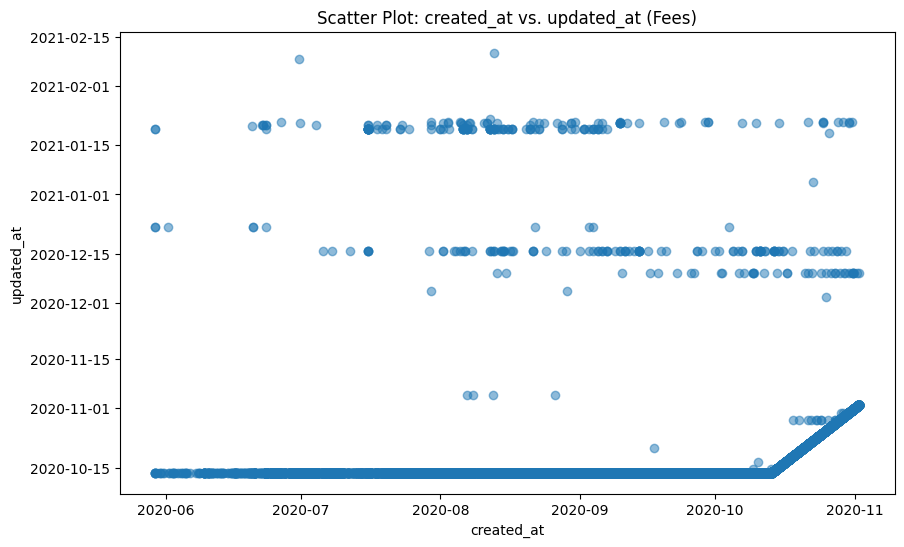

Scatter plot para la relevancia entre created_at y total amount, coloreado por status


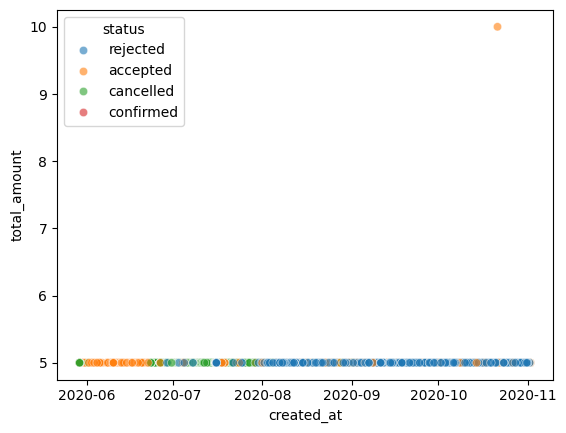

Tabulación cruzada entre 'reason' y 'category', esta relación muestra cuántos registros pertenecen a cada categoría.

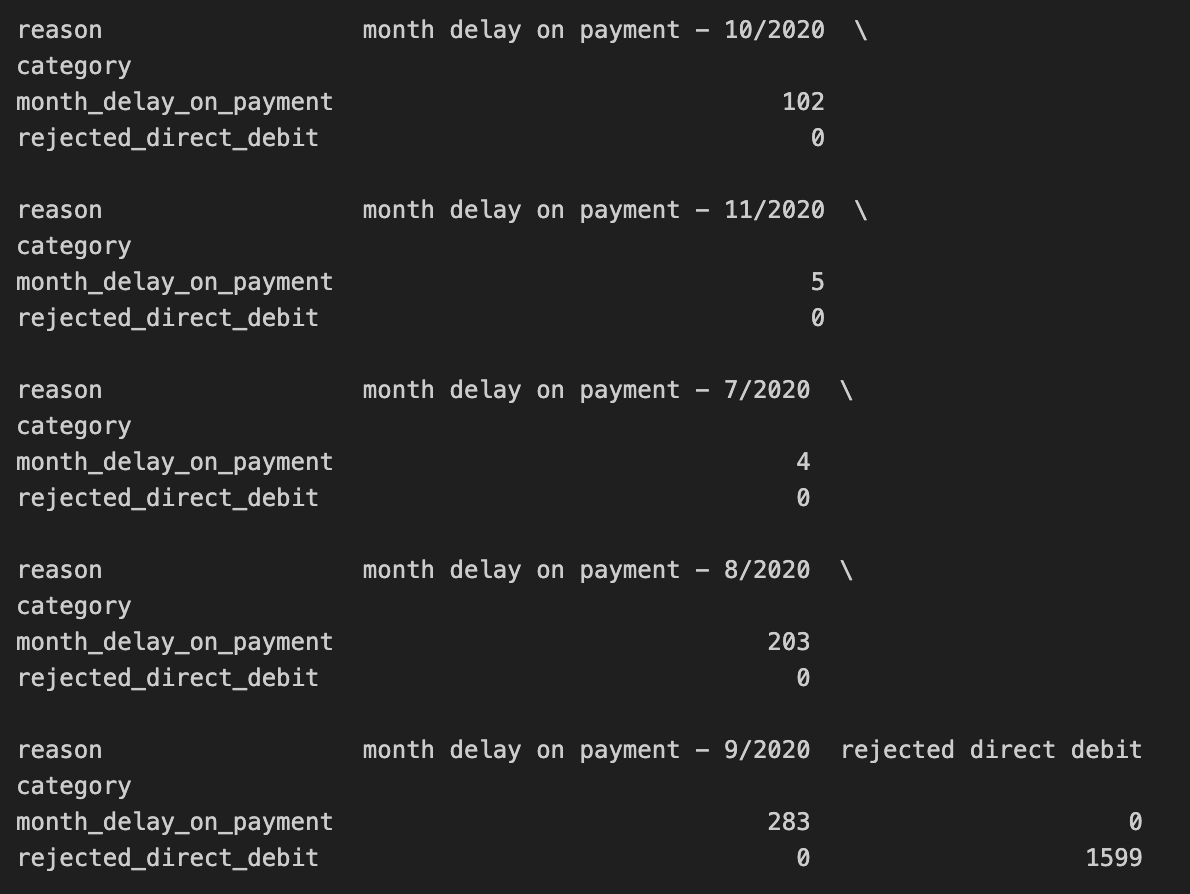

Observaciones clave:
- Todos los registros con category = month_delay_on_payment están asociados a razones relacionadas con retrasos mensuales.
- No hay ninguna coincidencia de rejected_direct_debit en estas razones.

A continuación podemos ver la tabulación cruzada entre 'type' y 'category'

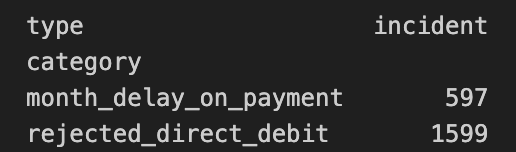

Observaciones clave:
Las categorías (category) están relacionadas con el tipo (type):
- month_delay_on_payment: 597 registros están clasificados como incident.
- rejected_direct_debit: 1599 registros también están clasificados como incident.

Se puede entender que existe una relación jerarquica entre:
*type → category → reason*

Otras pruebas realizadas, sin outputs considerables:
- Relevancia y Auditabilidad: {'Fees Irrelevant Status Count': 0, 'Fees Negative Amount Count': 0}
- Relevancia y Auditabilidad: {'CashRequest Irrelevant Status Count': 0, 'CashRequest Negative Amount Count': 0}



4. **Unicidad**  
   - Evaluación: ¿Qué tan únicos son los datos?  
   - Métrica: Número de valores duplicados detectados. 

Se investigaron valores duplicados, y no se encontró ninguno para df_fees, ni para df_cashrequest.


5. **Validez**  
   - Evaluación: ¿Cumplen los datos con los valores permitidos?  
   - Métrica: Número de valores fuera de rango o inválidos.  


**5.1 Validez para df_cashrequest**

- Se observaron si habían valores inferiores a 0 en 'amount' 

A continuación se observan dos gráficas correspondientes a variables categóricas y numericas, las cuales son relevantes del dataset.

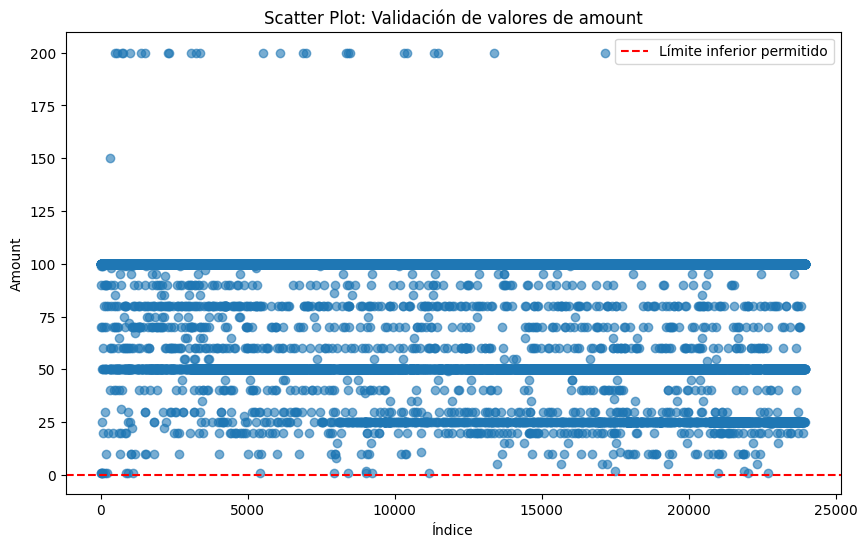

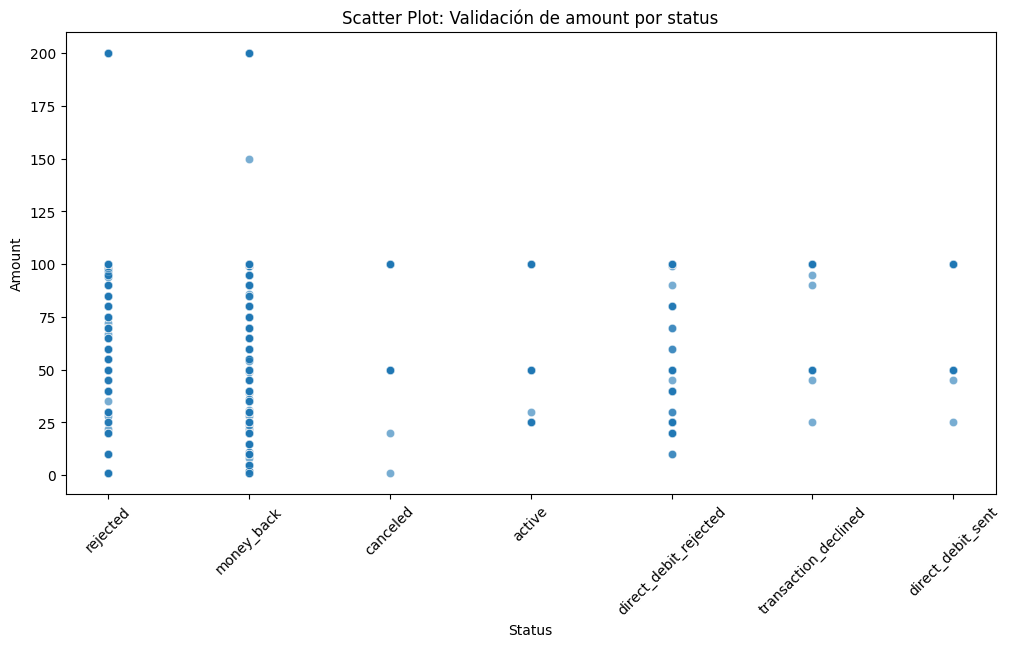

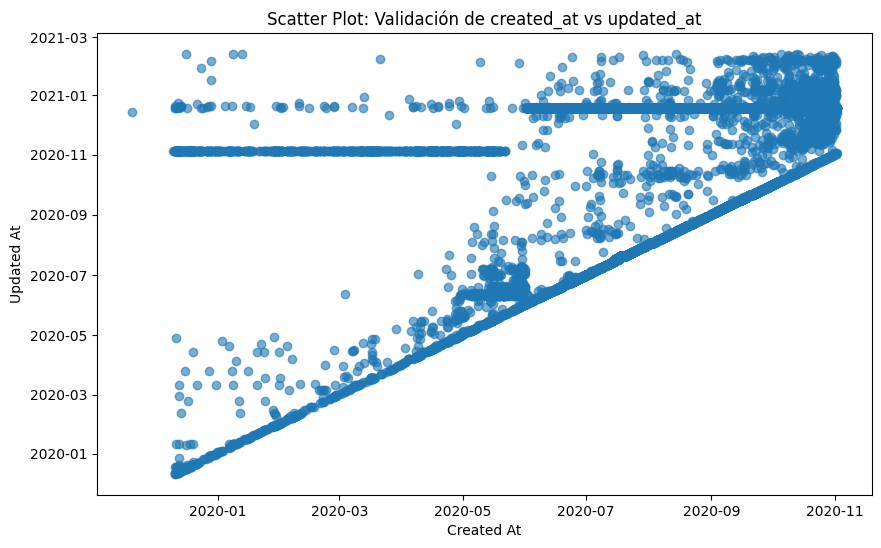

Observaciones principales:
- No se observan valores negativos en la primera gráfica, valores comunes 50, 75 y 100, y quizás algunos atípicos como 125.
- Los valores más altos de amount (cercanos a 200) se distribuyen principalmente en rejected y money_back.
- Estados como direct_debit_rejected o transaction_declined tienen registros con montos más dispersos, los cuales pueden ser más problemáticos.
- Algunos puntos están por encima de la diagonal en grandes cantidades de tiempo (por ejemplo, updated_at en 2021 mientras created_at está en 2020). Estos registros se revisarón y se obtuvieron resultados relevantes.

**5.2 Validez para df_fees**


- Se verificó la variable 'amount' con valores inválidos, obteniendo como resultado 0.

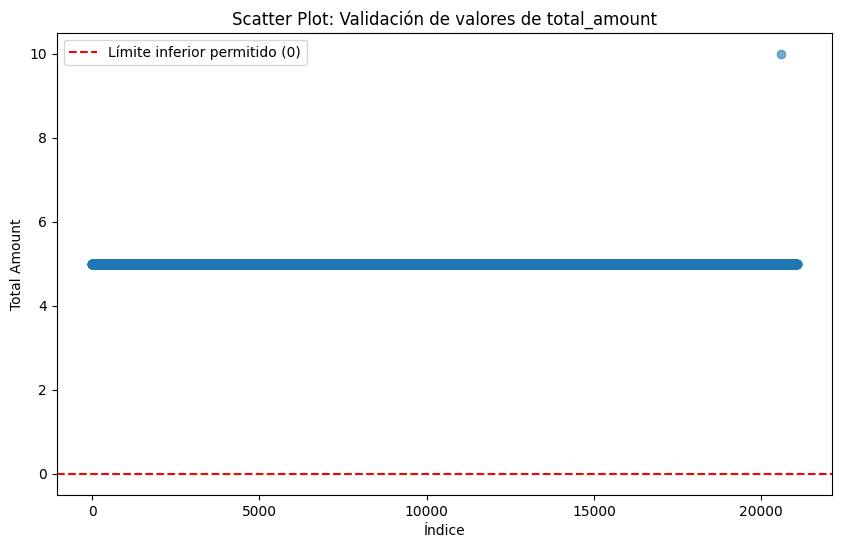

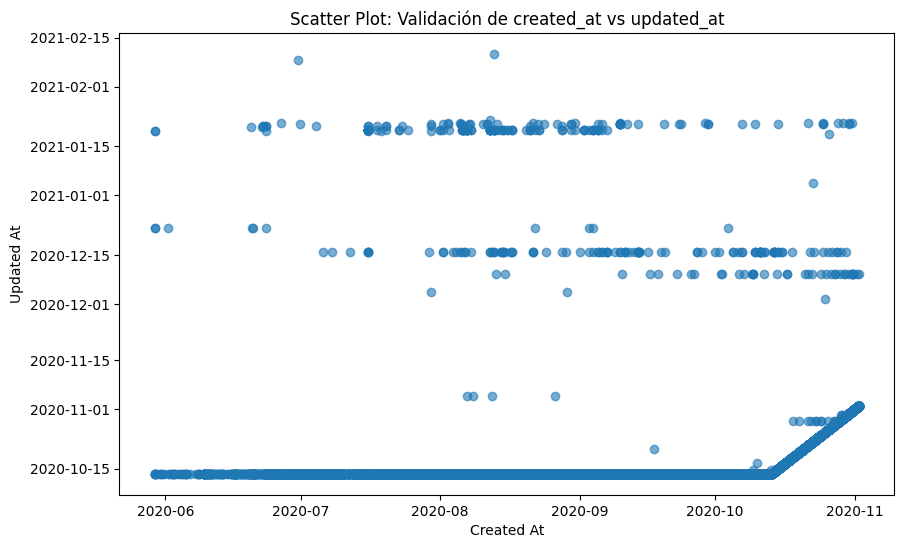

 

6. **Integridad estructural**  
   - Evaluación: Revisar el formato y estructura de los datos 
   - Métrica: Transformar el dataset para su uso en modelos personalizados.

**6.1 Integridad estructural para df_cashrequest**


Para facilitar el manejo de los datos y la aplización de modelos algoritmicos personalizados se convirtieron las variables categóricas en numéricas a travez de Label Encoding

Las variables categóricas:
- recovery_status
- transfer_type
- status
- payment
- payments_issue

De tal manera que cada variable tendrá una nueva columna con la terminación _encoding. 


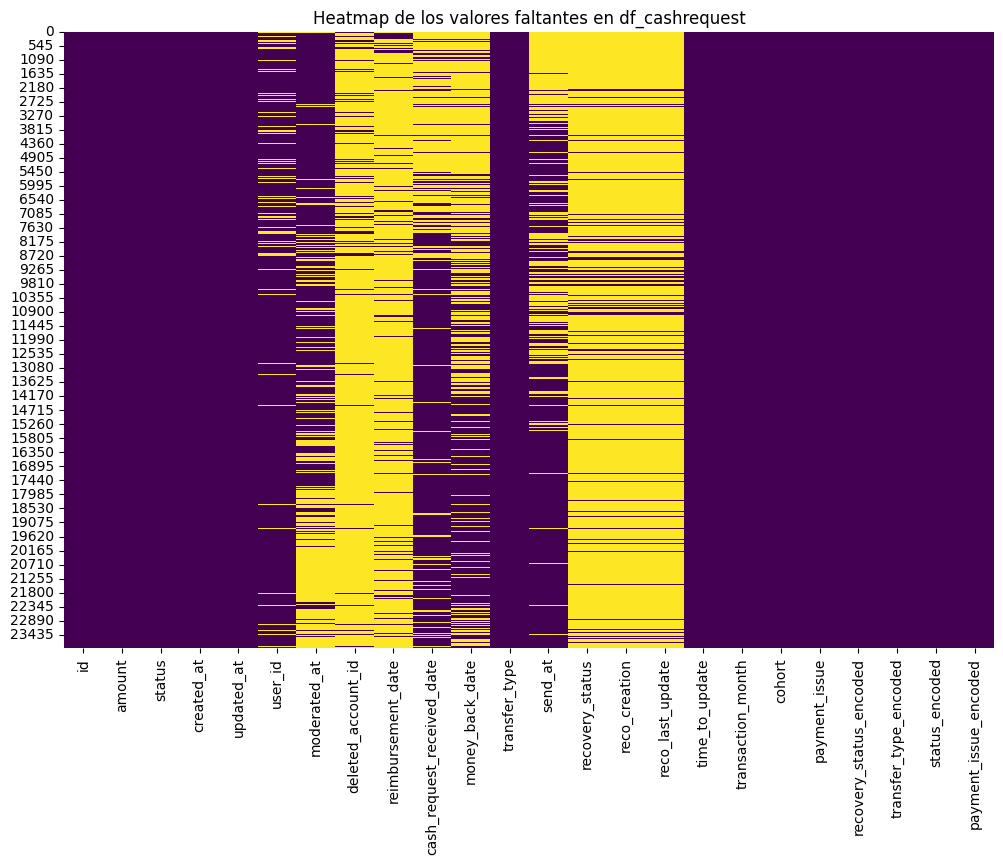

**6.2 Integridad estructural para df_fees**


Lógica para la función imputar 'category'

El código tiene como objetivo imputar valores faltantes en la columna category basándose en la lógica definida según el valor de la columna type:

Si el valor en category es nulo (pd.isnull(row['category'])):

- Si type es 'instant_payment' o 'postpone', se asigna 'rejected_direct_debit' como valor imputado.
- Si type es 'incident', se asigna un valor basado en una probabilidad:
  - 80% de probabilidad de asignar 'rejected_direct_debit'.
  - 20% de probabilidad de asignar 'month_delay_on_payment'.
- Si el valor en category no es nulo, se mantiene el valor original.


Comprender las relaciones entre columnas from_date y to_date, se plantea la siguiente lógica para completar los datos:

- Si paid_at existe, from_date puede ser predeterminado en paid_at - X días.
- Si from_date existe pero to_date no, establezca to_date = from_date + default_duration.
- Completar los espacios restantes con valores medios o medianos de from_date y to_date para el conjunto de datos

Nota: Se realizó un primer intento mediante el método de interpolación con valores vecinos, pero los rangos eran tan amplios que muchos valores se completaron como NaN.

El cálculo del tiempo medio entre from_date y to_date es de: 20.38

- Se completaron los valores de las columnas from_date, to_date y paid_at según la lógica explicada anteriormente.

- Se crearon nuevas variables: 
  - duration_days: to_date - from_date 
  - time_to_payment_days: paid at - from_date
  - Se realizó una limpieza de la variable 'reason', para obtener una nueva variable 'reason_id'

Para facilitar el manejo de los datos y la aplización de modelos algoritmicos personalizados se convirtieron las variables categóricas en numéricas a travez de Label Encoding

Las variables categóricas:
- type
- status
- category
- reason

De tal manera que cada variable tendrá una nueva columna con la terminación _encoding. 


Se revisaron posibles incosistencias y se resolvieron, finalmente el dataset quedo completo de la siguiente manera:

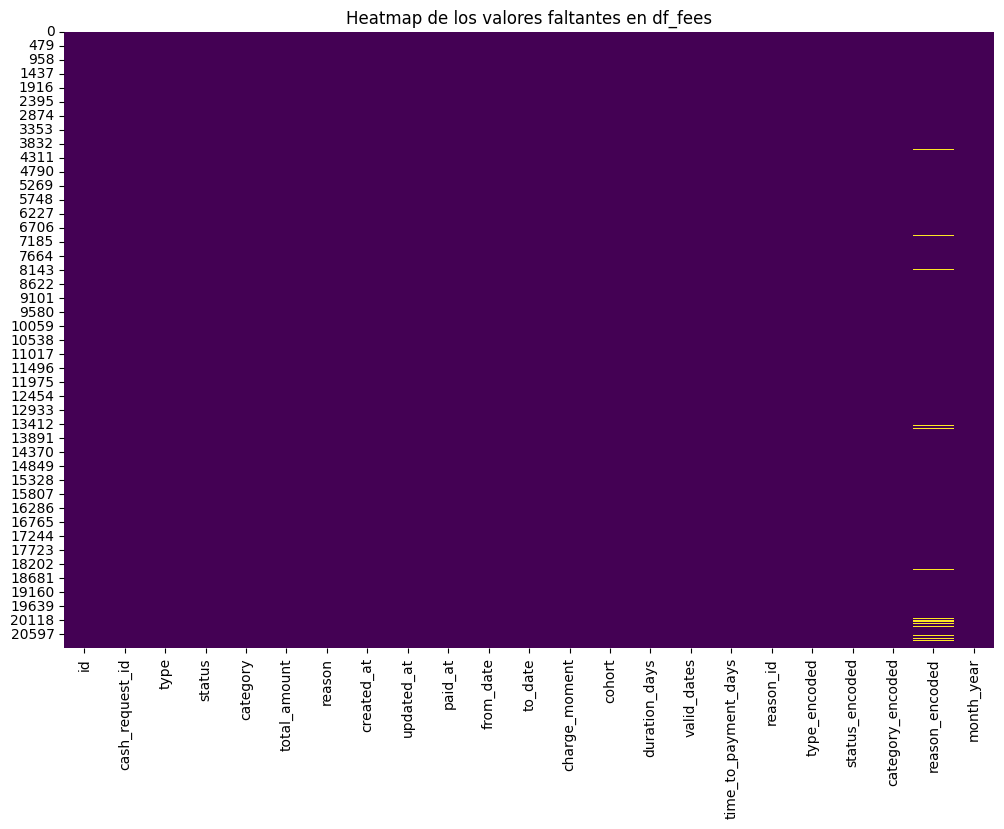